In [1]:
import math
import pandas
import plotly
import numpy as np
import matplotlib.pyplot as plt


# sklearn basic
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# sklearn model
from sklearn import tree
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor




# ensemble learning
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor




pandas.set_option('display.max_columns', None)

**Read CSV**

In [2]:
df = pandas.read_csv("train.csv", header = 0)
df = df.drop(columns = ["Street", "Utilities", "PoolQC", "GarageYrBlt"])
# df = df.drop(columns = ["Street", "Utilities", "PoolQC", "GarageYrBlt", "MoSold", "YrSold", "YearBuilt", "YearRemodAdd"])

**Convert to one-hot**
- MSSubClass, MSZoning, Street, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, Electrical, Functional, GarageType, PavedDrive, Fence, MiscFeature, SaleType, SaleConditionc, Alley

In [3]:
cate_list =["Alley","MSSubClass", "MSZoning", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", "Electrical", "Functional", "GarageType", "PavedDrive", "Fence", "MiscFeature", "SaleType", "SaleCondition"]

In [4]:
for c in cate_list:
    lis = []
    for i in df[c].unique():
        if(not isinstance(i, float)):
#             if(not math.isnan(i)):
            lis.append((i))
        
    Type = pandas.DataFrame(columns = sorted(lis, reverse = False)) # create the new dataframe base the all the type key found
    key = list(Type.keys()) # loop over all the types
    count = 0

    for i in df[c].tolist():
        value_list = np.zeros(len(key)).reshape(1,len(key)) # default all 0
        value_list = pandas.DataFrame(value_list, columns = key)
        Type = Type.append(value_list) # append the new row into dataframe
        Type.iloc[count][(i)] = 1 # the select type feature will be 1
        count += 1 # index the current row
        
    for i in Type.keys():
        df[str(c)+str(i)] = Type[i].tolist()
df = df.drop(columns = cate_list)

**Convert to Boolean**

In [5]:
CA_list = df["CentralAir"].tolist()
CA_Convert_list = []
for i in CA_list:
    if(i == "N"):
        CA_Convert_list.append(0)
    else:
        CA_Convert_list.append(1)
df["CentralAir_New"] = CA_Convert_list
df = df.drop(columns = ["CentralAir"])

**Convert to Rank**

- LotShape, LandContour, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageFinish, GarageQual, GarageCond, PoolQC

- OverallQual, OverallCond

In [6]:
LotShape_Convert_list = []
for i in df["LotShape"].tolist():
    if(i == "Reg"):
        LotShape_Convert_list.append(3)
    elif(i == "IR1"):
        LotShape_Convert_list.append(2)
    elif(i == "IR2"):
        LotShape_Convert_list.append(1)
    elif(i == "IR3"):
        LotShape_Convert_list.append(0)
df["LotShape_New"] = LotShape_Convert_list
df = df.drop(columns = ["LotShape"])

In [7]:
LandContour_Convert_list = []
for i in df["LandContour"].tolist():
    if(i == "Lvl"):
        LandContour_Convert_list.append(3)
    elif(i == "Bnk"):
        LandContour_Convert_list.append(2)
    elif(i == "HLS"):
        LandContour_Convert_list.append(1)
    elif(i == "Low"):
        LandContour_Convert_list.append(0)
df["LandContour_New"] = LandContour_Convert_list
df = df.drop(columns = ["LandContour"])

In [8]:
for k in ["ExterCond", "ExterQual", "HeatingQC", "KitchenQual"]:
    ExterQual_Convert_list = []
    for i in df[k].tolist():
        if(i == "Ex"):
            ExterQual_Convert_list.append(4)
        elif(i == "Gd"):
            ExterQual_Convert_list.append(3)
        elif(i == "TA"):
            ExterQual_Convert_list.append(2)
        elif(i == "Fa"):
            ExterQual_Convert_list.append(1)
        elif(i == "Po"):
            ExterQual_Convert_list.append(0)
    df[str(k)+"_New"] = ExterQual_Convert_list
    df = df.drop(columns = [k])

In [9]:
for k in ["BsmtExposure"]:
    ExterQual_Convert_list = []
    for i in df[k].tolist():
        if(not isinstance(i, float)):
            if(i == "Gd"):
                ExterQual_Convert_list.append(4)
            elif(i == "Av"):
                ExterQual_Convert_list.append(3)
            elif(i == "Mn"):
                ExterQual_Convert_list.append(2)
            elif(i == "No"):
                ExterQual_Convert_list.append(1)
        else:
            ExterQual_Convert_list.append(0)


    df[str(k)+"_New"] = ExterQual_Convert_list
    df = df.drop(columns = [k])

In [10]:
for k in ["BsmtCond", "BsmtQual", "FireplaceQu", "GarageQual", "GarageCond"]:
    BsmtQual_Convert_list = []
    for i in df[k].tolist():
        if(not isinstance(i, float)):
            if(i == "Ex"):
                BsmtQual_Convert_list.append(5)
            elif(i == "Gd"):
                BsmtQual_Convert_list.append(4)
            elif(i == "TA"):
                BsmtQual_Convert_list.append(3)
            elif(i == "Fa"):
                BsmtQual_Convert_list.append(2)
            elif(i == "Po"):
                BsmtQual_Convert_list.append(1)
            elif(i == "NA"):
                BsmtQual_Convert_list.append(0)
        else:
            BsmtQual_Convert_list.append(0)


    df[str(k)+"_New"] = BsmtQual_Convert_list
    df = df.drop(columns = [k])

In [11]:
for k in ["BsmtFinType1", "BsmtFinType2"]:
    BsmtQual_Convert_list = []
    for i in df[k].tolist():
        if(not isinstance(i, float)):
            if(i == "GLQ"):
                BsmtQual_Convert_list.append(6)
            elif(i == "ALQ"):
                BsmtQual_Convert_list.append(5)
            elif(i == "Rec"):
                BsmtQual_Convert_list.append(4)
            elif(i == "BLQ"):
                BsmtQual_Convert_list.append(3)
            elif(i == "LwQ"):
                BsmtQual_Convert_list.append(2)
            elif(i == "Unf"):
                BsmtQual_Convert_list.append(1)
            elif(i == "NA"):
                BsmtQual_Convert_list.append(0)
        else:
            BsmtQual_Convert_list.append(0)


    df[str(k)+"_New"] = BsmtQual_Convert_list
    df = df.drop(columns = [k])


In [12]:
for k in ["GarageFinish"]:
    BsmtQual_Convert_list = []
    for i in df[k].tolist():
        if(not isinstance(i, float)):
            if(i == "Fin"):
                BsmtQual_Convert_list.append(3)
            elif(i == "RFn"):
                BsmtQual_Convert_list.append(2)
            elif(i == "Unf"):
                BsmtQual_Convert_list.append(1)
            elif(i == "NA"):
                BsmtQual_Convert_list.append(0)
        else:
            BsmtQual_Convert_list.append(0)
df[str(k)+"_New"] = BsmtQual_Convert_list
df = df.drop(columns = [k])

In [13]:
# replace nan to 0
df["LotFrontage"] = df["LotFrontage"].fillna(0).tolist()
df["MasVnrArea"] = df["MasVnrArea"].fillna(0).tolist()
df = df.drop(columns = ["Id"])


In [14]:
scale_df = df.drop(columns = ["SalePrice"])
keys = list(scale_df.keys())

scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(scale_df)
scale_df = scaler.transform(scale_df)
scale_df = pandas.DataFrame(scale_df, columns = keys)
scale_df["SalePrice"] = df["SalePrice"].tolist()


In [15]:
df = scale_df

**PCA**

In [ ]:
candidate_components = range(10, 240, 30)
explained_ratios = []
for c in candidate_components:
    pca = PCA(n_components=c)
    X_pca = pca.fit_transform(df.drop(columns = ["SalePrice"]))
    explained_ratios.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.plot(candidate_components, explained_ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.5, 1.05, .05))
plt.xticks(np.arange(0, 300, 20))

In [ ]:
Y = df["SalePrice"].tolist()
X = df.drop(columns = ["SalePrice"]).values.tolist()
pca = sklearn.decomposition.PCA(n_components=100)
pca.fit(X)
X = pca.transform(X)


In [ ]:
X.shape

**Dataset**

In [16]:
# sklearn split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(
    df.drop(columns = "SalePrice").values.tolist(), 
    df["SalePrice"].tolist(),
    test_size=0.07, 
    random_state=42)

# stacking dataset or vaild for boosting
Train_Stacking_X = Train_X[:150]
Train_Stacking_Y = Train_Y[:150]

Train_X = Train_X[150:]
Train_Y = Train_Y[150:]

In [ ]:
# pandas shuffle
dataset = shuffle(df)
Test = dataset[:100]
Train = dataset[100:]

Train_Stacking = Train[:300]
Train = Train[300:]

Test_X = Test.drop(columns = "SalePrice").values.tolist()
Test_Y = Test["SalePrice"].tolist()

Train_X = Train.drop(columns = "SalePrice").values.tolist()
Train_Y = Train["SalePrice"].tolist()

Train_Stacking_X = Train_Stacking.drop(columns = "SalePrice").values.tolist()
Train_Stacking_Y = Train_Stacking["SalePrice"].tolist()

In [ ]:
# After PCA
Test = X[:100]
Train = X[100:]

Test_X = Test
Test_Y = Y[:100]

Train_X = Train
Train_Y = Y[100:]

## Machine Learning Model

In [223]:
rng = np.random.RandomState(1)

**Adam Boost**

In [17]:
# Adam boost for the model and return the best selection via given datasets
def Ada_Model(model, Train_X, Train_Y, Vail_X, Vail_Y):
    highest = 0
    coeff = 0
    rng = np.random.RandomState(1)
    for i in range(1, 20):
        AdaBoost_model = AdaBoostRegressor(base_estimator=model, n_estimators=i, random_state=rng)
        AdaBoost_model.fit(Train_X, Train_Y)
        curr_score = AdaBoost_model.score(Vail_X, Vail_Y)
        if(highest < curr_score):
            highest = curr_score
            coeff = i
    return coeff, highest


**Bagging**

In [181]:
def Bagging(model, Train_X, Train_Y, Vail_X, Vail_Y):  
    highest = 0
    coeff = 0
    rng = np.random.RandomState(1)
    for i in range(1, 20):
        Bagging_Model = BaggingRegressor(base_estimator= model, n_estimators = i, bootstrap=True, warm_start=True) #
        Bagging_Model.fit(Train_X, Train_Y)
        curr_score = Bagging_Model.score(Vail_X, Vail_Y)
        if(highest < curr_score):
            highest = curr_score
            coeff = i
    return coeff, highest

# sklearn.ensemble.BaggingRegressor(base_estimator=None, 
# n_estimators=10, 
# max_samples=1.0, 
# max_features=1.0, 
# bootstrap=True, 
# bootstrap_features=False, 
# oob_score=False, 
# warm_start=False, 
# n_jobs=None, 
# random_state=None, verbose=0)

**Gradient Boosting**

In [ ]:
def GBDT(model, Train_X, Train_Y, Vail_X, Vail_Y):
    coeff = 0
    highest = 0
    _range = np.arange(0.01, 1, 0.05)
    for i in (_range):
        GBDT = GradientBoostingRegressor(init = model, learning_rate = i)
        GBDT.fit(Train_X, Train_Y)
        curr_score = GBDT.score(Train_Stacking_X, Train_Stacking_Y)
        if(highest < curr_score):
            highest = curr_score
            coeff = i
    return coeff, highest

**Neural Network**

In [18]:
NN = MLPRegressor(solver='adam',  # weight optimization
                    activation='relu',  # activation function
                    alpha=1e-2, # Regularizer value
                    learning_rate_init = 0.1,
                    hidden_layer_sizes=(30,20,5), # layer and node (node,node) --> numbers of layers

                  random_state=1, #random state
                    max_iter = 1000, # max iteration
                    early_stopping = True) # early stop

NN.fit(Train_X, Train_Y) # fit the neural network


MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(30, 20, 5), learning_rate='constant',
             learning_rate_init=0.1, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
NN.score(Train_X, Train_Y)

0.8765227063911397

In [20]:
NN.score(Test_X, Test_Y)

0.8621464009981835

**Elastic Net + Adam Boost**

In [165]:
Net = ElasticNet(random_state=0, warm_start = True)
Net.fit(Train_X, Train_Y)  
Net.score(Train_X,Train_Y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=True)

In [167]:
Net.score(Test_X,Test_Y)

0.6134309769745292

In [174]:
coeff, highest = Bagging(Net, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

(14, 0.5606226499645343)

In [175]:
Bagging_Net = BaggingRegressor(base_estimator =  Net, n_estimators = coeff, bootstrap=False, warm_start=True)
Bagging_Net.fit(Train_X, Train_Y)
Bagging_Net.score(Test_X, Test_Y)

0.6134309769745292

In [176]:
# Boosting Net
coeff, highest = Ada_Model(Bagging_Net, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

(14, 0.6430038853799636)

In [177]:
# for i in range(0,3):
AdaBoost_Net = AdaBoostRegressor(base_estimator=Bagging_Net, n_estimators=coeff, random_state=rng)
AdaBoost_Net.fit(Train_X, Train_Y)
AdaBoost_Net.score(Train_X, Train_Y)

0.6724249223744102

In [178]:
AdaBoost_Net.score(Test_X,Test_Y)

0.6871160780408823

**Ridge Regression**

In [29]:
highest = 0
coeff = 0
for i in np.arange(0, 10, 0.1): # find the best regularizer value
    ridge = Ridge(alpha=i)
    ridge.fit(Train_X, Train_Y)
#     ridge.score(Train_X, Train_Y)
    curr_score = ridge.score(Train_Stacking_X, Train_Stacking_Y)
    if(highest < curr_score):
        highest = curr_score
        coeff = i

In [30]:
highest,coeff

(0.886179169216485, 0.2)

In [31]:
ridge = Ridge(alpha=coeff)
ridge.fit(Train_X, Train_Y)
ridge.score(Train_X, Train_Y)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
ridge.score(Test_X, Test_Y)

0.8649592609207901

**Linear Regression**

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(Train_X, Train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
lr.score(Train_X, Train_Y)

0.9221279413928494

In [37]:
lr.score(Test_X, Test_Y)

-8.43628072406134e+19

**Decision Tree**

In [38]:
coeff = 0
highest = 0
for i in range(1,10):
    Tree = tree.DecisionTreeRegressor(max_depth = i)
    Tree.fit(Train_X, Train_Y)
    curr_score = Tree.score(Train_Stacking_X, Train_Stacking_Y)
    if(highest < curr_score):
        highest = curr_score
        coeff = i


In [39]:
highest, coeff

(0.8590828891851584, 6)

In [40]:
Tree = tree.DecisionTreeRegressor(max_depth = coeff)
Tree.fit(Train_X, Train_Y)
Tree.score(Train_X,Train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [42]:
Tree.score(Test_X,Test_Y)

0.7600107200909199

In [182]:
coeff, highest = Bagging(Tree, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

(3, 0.9003388849621241)

In [191]:
Bagging_Tree = BaggingRegressor(base_estimator =  Tree, n_estimators = coeff, bootstrap=False, warm_start=True)
Bagging_Tree.fit(Train_X, Train_Y)
Bagging_Tree.score(Train_X, Train_Y)

0.7600107200909199

In [ ]:
Bagging_Tree.score(Test_X, Test_Y)

In [192]:
coeff, highest = Ada_Model(Bagging_Tree, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)

In [193]:
highest, coeff

(0.9008207117392856, 16)

In [198]:
AdaBoost_Tree = AdaBoostRegressor(base_estimator=Bagging_Tree, n_estimators=coeff, random_state=rng)
AdaBoost_Tree.fit(Train_X, Train_Y)
AdaBoost_Tree.score(Train_X, Train_Y)

0.9582202615634807

In [199]:
AdaBoost_Tree.score(Test_X, Test_Y)

0.8804440726978119

**Bayesian Ridge**

In [48]:
BR = BayesianRidge()
BR.fit(Train_X, Train_Y)
BR.score(Train_X, Train_Y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [50]:
BR.score(Test_X, Test_Y)

0.8681998400678294

**KNR**

In [51]:
n = 100
highest = 0
node = 0
for i in range(1,100):
    neigh = KNeighborsRegressor(n_neighbors = i, algorithm = "auto", weights = "distance") #n_neighbors=2
    neigh.fit(Train_X, Train_Y) 
#     curr_score = neigh.score(Train_X[:n], Train_Y[:n])
    curr_score = neigh.score(Train_Stacking_X, Train_Stacking_Y)
    if(highest < curr_score):
        highest = curr_score
        node = i

In [52]:
node, highest

(1, 0.7204476074441567)

In [203]:
KNR = KNeighborsRegressor(n_neighbors = node, algorithm = "auto", weights = "distance") #n_neighbors=2
KNR.fit(Train_X, Train_Y) 
KNR.score(Test_X, Test_Y)

0.7032469819887143

In [204]:
KNR.score(Test_X, Test_Y)

0.7032469819887143

In [205]:
coeff, highest = Bagging(KNR, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

(8, 0.7585914045707495)

In [209]:
Bagging_KNR = BaggingRegressor(base_estimator =  KNR, n_estimators = coeff, bootstrap=False, warm_start=True)
Bagging_KNR.fit(Train_X, Train_Y)
Bagging_KNR.score(Train_X, Train_Y)

1.0

In [210]:
Bagging_KNR.score(Test_X, Test_Y)

0.7032469819887143

In [213]:
coeff, highest = Ada_Model(Bagging_KNR, Train_X, Train_Y, Train_Stacking_X, Train_Stacking_Y)
coeff, highest

(7, 0.7469084608436959)

In [221]:
AdaBoost_KNR = AdaBoostRegressor(base_estimator=Bagging_KNR, n_estimators=coeff, random_state=rng)
AdaBoost_KNR.fit(Train_X, Train_Y)
AdaBoost_KNR.score(Train_X, Train_Y)

0.9908341597373844

In [222]:
AdaBoost_KNR.score(Test_X, Test_Y)

0.7162482773870065

**SVR**

In [60]:
# svr_poly = SVR(kernel='rbf', C=1e7, gamma='auto',  epsilon=.1, coef0=1)
# svr_poly = SVR(kernel='poly', C=1e7, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_poly = SVR(kernel='poly', C=1e7, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_poly.fit(Train_X, Train_Y)
svr_poly.score(Train_X,Train_Y)

In [63]:
svr_poly.score(Test_X,Test_Y)

0.9004236321539211

## Ensemble Learning

In [93]:
#select all, strong, and weak models to ensemble

all_models = [NN, BR, Net, AdaBoost_Net, Tree, AdaBoost_Tree, ridge, KNR, AdaBoost_KNR, svr_poly]
all_models_labels = ["NN", "BR", "Net", "AdaBoost_Net", "Tree", "AdaBoost_Tree", "Ridge", "KNR", "AdaBoost_KNR", "SVR"]

strong_models = [NN, BR, AdaBoost_Tree, ridge, svr_poly]
strong_models_labels = ["NN", "BR", "AdaBoost_Tree", "Ridge", "SVR"]

weak_models = [AdaBoost_Net, Tree, KNR]
weak_models_labels = ["AdaBoost_Net", "Tree", "KNR"]


### **Ensemble Learning - Voting**

In [76]:
lis = []
for i in zip(all_models_labels,all_models):
    lis.append(i)

VR_all_models = VotingRegressor(estimators=lis)
VR_all_models.fit(Train_X, Train_Y)
VR_all_models.score(Train_X, Train_Y) # Training score

0.9493219904433526

In [75]:
VR_all_models.score(Test_X, Test_Y) # Testing Score

0.8722658823683983

**Voting with strong models**

In [77]:
lis = []
for i in zip(strong_models_labels,strong_models):
    lis.append(i)

VR_strong_models = VotingRegressor(estimators=lis)
VR_strong_models.fit(Train_X, Train_Y)
VR_strong_models.score(Train_X, Train_Y) # Training score

0.947195160928139

In [78]:
VR_strong_models.score(Test_X, Test_Y) # Testing Score

0.8917000627803915

**Voting with weak models**

In [79]:
lis = []
for i in zip(weak_models_labels,weak_models):
    lis.append(i)

VR_weak_models = VotingRegressor(estimators=lis)
VR_weak_models.fit(Train_X, Train_Y)
VR_weak_models.score(Train_X, Train_Y) # Training score

0.9421656805838154

In [80]:
VR_weak_models.score(Test_X, Test_Y)

0.81680678617802

### **Ensemble Learning - Stacking**

In [95]:
meta = MLPRegressor() # early stop

In [97]:
stregr = StackingRegressor(regressors=all_models, 
                           meta_regressor=meta)


stregr.fit(Train_Stacking_X, Train_Stacking_Y)
stregr.score(Train_Stacking_X, Train_Stacking_Y)

0.7978492995636454

In [98]:
stregr.score(Test_X, Test_Y)

0.6046081150579941

**Stacking with strong models**

In [99]:
stack_strong = StackingRegressor(regressors=strong_models, meta_regressor=meta) # strong models
stack_strong.fit(Train_Stacking_X, Train_Stacking_Y)
stack_strong.score(Train_Stacking_X, Train_Stacking_Y)

0.9548079772720761

In [100]:
stack_strong.score(Test_X, Test_Y)

0.7956730597195213

**Stacking with weak models**

In [106]:
stregr_weak = StackingRegressor(regressors=weak_models, meta_regressor=meta) # weak models
stregr_weak.fit(Train_Stacking_X, Train_Stacking_Y)
stregr_weak.score(Train_Stacking_X, Train_Stacking_Y)

0.9835620098882245

In [102]:
stregr_weak.score(Test_X, Test_Y)

0.7279210166298901

In [112]:
Bagging_all_models.score(Test_X, Test_Y)

0.7636692780262679

## Compare Result

In [81]:
len(Test_X) # numbers of test sample

103

In [82]:
NN.score(Test_X, Test_Y) #nerual network

0.8621464009981835

In [83]:
BR.score(Test_X, Test_Y) # Bayesian Ridge

0.8681998400678294

In [84]:
Net.score(Test_X, Test_Y) # Elastic Net 

0.6134309769745292

In [85]:
AdaBoost_Net.score(Test_X, Test_Y) # Elastic Net + Adma

0.7084190492296869

In [86]:
Tree.score(Test_X, Test_Y) # Decision Tree

0.7600107200909199

In [87]:
AdaBoost_Tree.score(Test_X, Test_Y) # Decision Tree + Adam

0.8920661487938788

In [88]:
ridge.score(Test_X, Test_Y) # ridge

0.8649592609207901

In [89]:
neigh.score(Test_X, Test_Y) # KNR

0.7032469819887143

In [90]:
AdaBoost_KNR.score(Test_X, Test_Y) # KNR + Adam

0.6927023097234939

In [91]:
svr_poly.score(Test_X, Test_Y) # svr 

0.9004236321539211

NameError: name 'stregr' is not defined

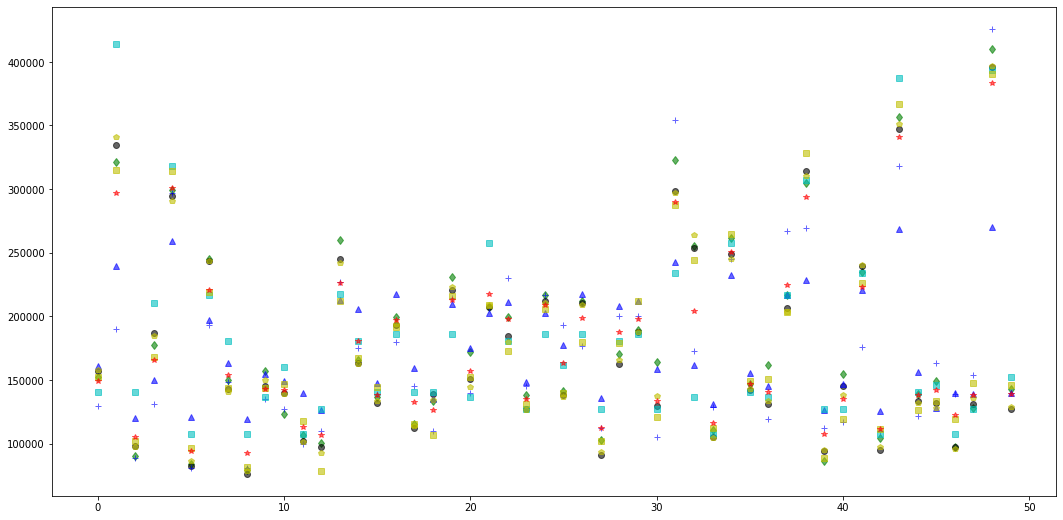

In [92]:

num = 50
xt = Test_X[:num]

alpha = 0.6
plt.figure(figsize=(18,9))
plt.plot(NN.predict(xt), 'gd',alpha = alpha, label='NN')
plt.plot(BR.predict(xt), 'ko',alpha = alpha, label='BR')
plt.plot(Net.predict(xt), 'b^',alpha = alpha, label='Net')
plt.plot(neigh.predict(xt), 'b+',alpha = alpha, label='KNR')
plt.plot(Tree.predict(xt), 'cs',alpha = alpha, label='Tree')
plt.plot(ridge.predict(xt), 'yp',alpha = alpha, label='Ridge')
plt.plot(svr_poly.predict(xt), 'ys',alpha = alpha, label='SVR')

plt.plot(ereg.predict(xt), 'r*',alpha = alpha, label='VotingRegressor')
plt.plot(stregr.predict(xt), 'm*',alpha = alpha, label='StackingRegressor')


plt.plot(Test_Y[:num], 'black', label='Y_Real')


plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.savefig('result.pdf')
plt.show()
